## <center> **SAS® Viya® Workbench의 Machine Learning Python API** </center>

---
### **1. Linear Models**
---

- **ElasticNet**  : L1 및 L2 정규화가 혼합된 선형 회귀 모델.

- **Lasso**  : L1 정규화를 사용하는 선형 회귀 모델.

- **LinearRegression**  : 최소자승법(Ordinary Least Squares)을 사용하는 선형 회귀 모델.

- **LogisticRegression**  : 로지스틱 회귀 분류기.

- **Ridge**  : L2 정규화를 사용하는 선형 회귀 모델.

---
### **2. Support Vector Models**
---

- **SVC**  : 서포트 벡터 분류(Support Vector Classification) 모델.

- **SVR**  : 서포트 벡터 회귀(Support Vector Regression) 모델.

### SVC - 파라미터

- **max_iter**: `int`, 선택 사항  
  훈련 반복의 최대 횟수를 지정합니다.

- **C**: `float`, 선택 사항  
  비용 정규화 파라미터를 지정합니다.

- **kernel**: `{“linear”, “poly”, “polynomial”, “rbf”, “sigmoid”}`, 선택 사항  
  사용할 커널의 유형을 지정합니다.

- **degree**: `int`, 선택 사항  
  다항식 커널의 차수를 지정합니다. 커널이 “polynomial”이 아닌 경우는 무시됩니다.

- **sigma**: `“auto”`, `“scale”` 또는 `float`, 선택 사항  
  RBF 및 Sigmoid 커널의 커널 파라미터를 지정합니다.

- **coef0**: `float`, 선택 사항  
  Sigmoid 커널의 두 번째 파라미터를 지정합니다.

- **method**: `{“activeset”, “cd”, “ipoint”}` 또는 `None`, 선택 사항  
  모델을 피팅할 때 사용하는 최적화 방법을 지정합니다.
  - **Active-Set**: 모든 커널에서 사용 가능하며, RBF 및 Sigmoid 커널과 3차 이상의 다항식 커널의 기본값입니다.
  - **Interior Point**: 선형 커널 및 다항식 커널에서 사용 가능하며, 선형 커널과 3차 이하의 다항식 커널의 기본값입니다.
  - **Coordinate Descent**: 선형 커널에서만 사용 가능합니다.

- **tol**: `float`, 선택 사항  
  조기 중지를 위한 허용 오차 임계값을 지정합니다.

- **random_state**: `int`, 선택 사항  
  난수 생성에 사용할 시드를 지정합니다.

- **scale**: `bool`, 선택 사항  
  True로 설정하면 훈련 전에 숫자 변수를 스케일링합니다.

- **verbose**: `int`, 선택 사항  
  피팅된 모델에 대해 출력할 정보의 양을 지정합니다.


### SVR - 파라미터 설명

- **max_iter**: `int`, 선택 사항  
  훈련 반복의 최대 횟수를 지정합니다.

- **C**: `float`, 선택 사항  
  비용 정규화 파라미터를 지정합니다.

- **kernel**: `{“linear”, “poly”, “polynomial”}`, 선택 사항  
  사용할 커널의 유형을 지정합니다.

- **degree**: `int`, 선택 사항  
  다항식 커널의 차수를 지정합니다. 커널이 “polynomial”이 아닌 경우는 무시됩니다.

- **tol**: `float`, 선택 사항  
  조기 중지를 위한 허용 오차 임계값을 지정합니다.

- **epsilon**: `float`, 선택 사항  
  epsilon-튜브 거리로, 실제 값과 예측 값의 차이가 이 거리 내에 있는 점들은 훈련 손실에 포함되지 않습니다.

- **random_state**: `int`, 선택 사항  
  난수 생성에 사용할 시드를 지정합니다.

- **scale**: `bool`, 선택 사항  
  True로 설정하면 훈련 전에 숫자 변수를 스케일링합니다.

- **verbose**: `int`, 선택 사항  
  피팅된 모델에 대해 출력할 정보의 양을 지정합니다.


---
### **3. Tree Models**
---

- **DecisionTreeClassifier** : 의사결정 나무 분류 모델.

- **DecisionTreeRegressor** : 의사결정 나무 회귀 모델.

- **ForestClassifier**  : 랜덤 포레스트 분류 모델.

- **ForestRegressor**  : 랜덤 포레스트 회귀 모델.

- **GradientBoostingClassifier**  : 그래디언트 부스팅 분류 모델.

- **GradientBoostingRegressor**  : 그래디언트 부스팅 회귀 모델.

---
### **#. Case Study**
---

In [2]:
import os
import pandas as pd
import numpy as np

In [13]:
churn_df = pd.read_csv( "/workspaces/workspace/sas-viya-workbench-hands-on/04. Python 핸즈온 코드/churn.csv")

In [14]:
churn_df.head(5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [16]:
X_df = churn_df.drop('Churn', axis=1)
y = churn_df['Churn']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, stratify=y, test_size = 0.2, random_state = 10)

In [18]:
#fit a simple logistic regression model
from sasviya.ml.linear_model import LogisticRegression

logreg = LogisticRegression(solver   = 'lbfgs',
                            tol      = 1e-4,
                            max_iter = 1000)

logreg.fit(X_train, y_train)

LogisticRegression(tol=0.0001, solver="lbfgs", max_iter=1000)

In [19]:
#fit a support vector machine classifier
from sasviya.ml.svm import SVC

svm = SVC(C=1.0,
          kernel="rbf")

svm.fit(X_train, y_train)

SVC(kernel="rbf")

In [20]:
#fit a decision tree model
from sasviya.ml.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion = "chisquare",
                               max_depth = 10,
                               ccp_alpha = 0)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion="chisquare")

In [21]:
#fit a random forest model
from sasviya.ml.tree import ForestClassifier

forest = ForestClassifier(criterion        = "chisquare",
                          n_estimators     = 100,
                          max_depth        = 7,
                          min_samples_leaf = 5,
                          bootstrap        = 0.6,
                          random_state     = 919)

forest.fit(X_train, y_train)

ForestClassifier(criterion="chisquare", max_depth=7, random_state=919)

In [22]:
#fit a tree-based gradient boosting model
from sasviya.ml.tree import GradientBoostingClassifier

gradboost = GradientBoostingClassifier(n_estimators     = 100,
                                       max_depth        = 4,
                                       min_samples_leaf = 5,
                                       learning_rate    = 0.1,
                                       subsample        = 0.8,
                                       random_state     = 919)

gradboost.fit(X_train, y_train)

GradientBoostingClassifier(subsample=0.8, random_state=919)

In [34]:
# 필요한 라이브러리 가져오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

# 모델 리스트 및 이름 정의
models = [
    ("Logistic Regression", logreg),
    ("Support Vector Machine", svm),
    ("Decision Tree", dtree),
    ("Random Forest", forest),
    ("Gradient Boosting", gradboost)
]

# 결과 저장용 리스트
metrics = []
roc_curves = []

# 모델 평가
for name, model in models:
    y_pred       = model.predict(X_test)
    y_proba      = model.predict_proba(X_test)
    y_pred_proba = proba[:, 1]

    # 평가지표 계산
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary")
    recall    = recall_score(y_test, y_pred, average="binary")
    f1        = f1_score(y_test, y_pred, average="binary")
    
    # ROC-AUC 계산
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score   = auc(fpr, tpr)
    roc_curves.append((name, fpr, tpr, auc_score))

    # 결과 저장
    metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc_score
    })

In [35]:
# 결과 출력
import pandas as pd
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.896825,0.826923,0.434343,0.569536,0.987768
1,Support Vector Machine,0.898413,0.872340,0.414141,0.561644,0.987768
2,Decision Tree,0.926984,0.784946,0.737374,0.760417,0.987768
3,Random Forest,0.941270,0.860465,0.747475,0.800000,0.987768
4,Gradient Boosting,0.952381,0.855670,0.838384,0.846939,0.987768


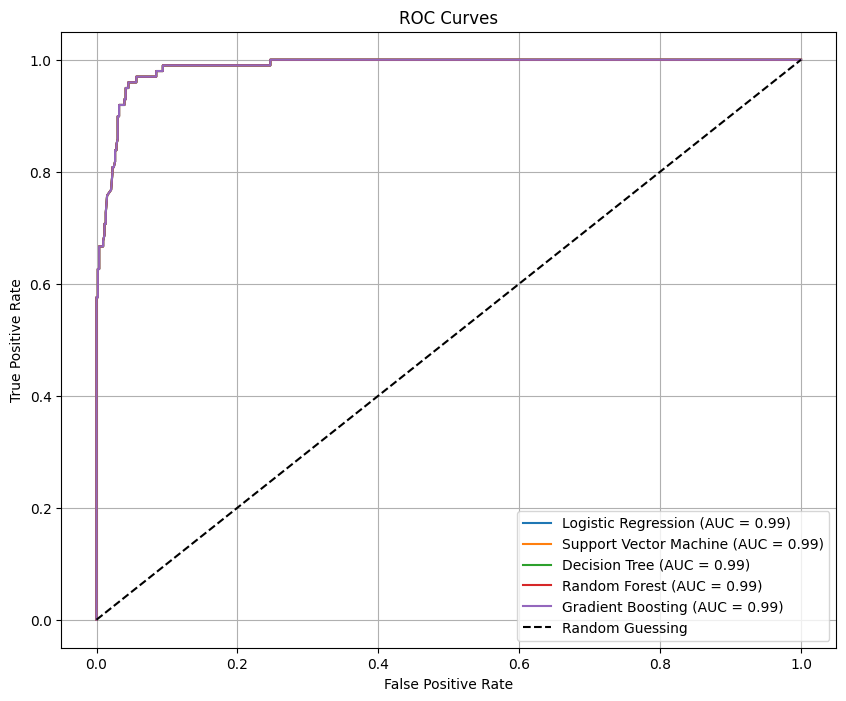

In [36]:
# ROC 커브 시각화
plt.figure(figsize=(10, 8))
for name, fpr, tpr, auc_score in roc_curves:
    if fpr is not None and tpr is not None:
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.show()